In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# File to Load (Remember to Change These)
# Read the Mouse and Drug Data and the Clinical Trial Data
# Combine the data into a single dataset
# Display the data table for preview
path=('clinicaltrial_data.csv')
path2=('mouse_drug_data.csv')
ctd=pd.read_csv(path)
mdd=pd.read_csv(path2)
ctd.head()
mdd.head()
len(ctd['Mouse ID'])
ctd['Mouse ID'].count()
mdd['Mouse ID'].count()
mdd_dup=mdd.duplicated(subset='Mouse ID', keep=False)
mdd.loc[mdd_dup]
#ctd.loc[ctd["Mouse ID"]=="g989"]
df=ctd.merge(mdd, on="Mouse ID")
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [3]:
#Keep the drugs of interest
keep=(df.Drug == 'Ketapril') | (df.Drug == 'Placebo') | (df.Drug == 'Infubinol') | (df.Drug == 'Capomulin') 
df2=df[keep]

In [4]:
# 
#sp=df2.groupby(["Drug", "Timepoint"]).agg({"Tumor Volume (mm3)" : "mean", "Metastatic Sites" : "mean", "Mouse ID" : "count"})
#sp

In [5]:
#sp.head()

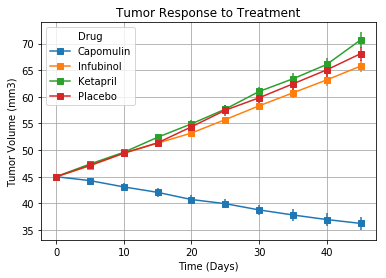

In [6]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
# Preview DataFrame
Meta_vol=df2.pivot_table(index='Timepoint',columns='Drug', values='Tumor Volume (mm3)',aggfunc='mean')
Meta_vol_std=df2.pivot_table(index='Timepoint',columns='Drug', values='Tumor Volume (mm3)',aggfunc='sem')
Meta_vol
#colors = ['r','b','g','o']
#markers= ['s','d','o','^']
# Generate plot for the Mean Tumor Volume Data Grouped by Drug and Timepoint 
ax= Meta_vol.plot(yerr=Meta_vol_std,marker='s')
fig = ax.get_figure()
plt.grid(b=True, which='both', color='0.65', linestyle='-')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Time (Days)')
plt.title('Tumor Response to Treatment')
fig.savefig('Meta_vol.png')

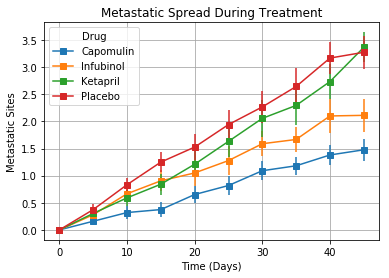

In [7]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
# Preview DataFrame
Meta_site=df2.pivot_table(index='Timepoint',columns='Drug', values="Metastatic Sites",aggfunc='mean')
Meta_site_std=df2.pivot_table(index='Timepoint',columns='Drug', values="Metastatic Sites",aggfunc='sem')
Meta_site
# Generate plot for Metastatic spread of the tumor during treatment
ax=Meta_site.plot(yerr=Meta_site_std,marker='s')
fig = ax.get_figure()
plt.grid(b=True, which='both', color='0.65', linestyle='-')
plt.ylabel("Metastatic Sites")
plt.xlabel('Time (Days)')
plt.title('Metastatic Spread During Treatment')
fig.savefig('Meta_site.png')

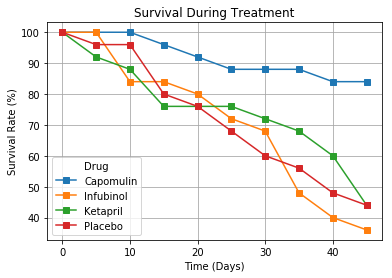

In [8]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
# Preview DataFrame
Mouse_count=df2.pivot_table(index='Timepoint',columns='Drug', values="Mouse ID",aggfunc='count')
x=Mouse_count.max()[0]
Mouse_count=(Mouse_count/x)*100
Mouse_count
# Generate the Plot (Accounting for percentages) and survival during treatment
ax=Mouse_count.plot(marker='s')
fig = ax.get_figure()
plt.grid(b=True, which='both', color='0.65', linestyle='-')
plt.ylabel("Survival Rate (%)")
plt.xlabel('Time (Days)')
plt.title('Survival During Treatment')
fig.savefig('Mouse_count.png')

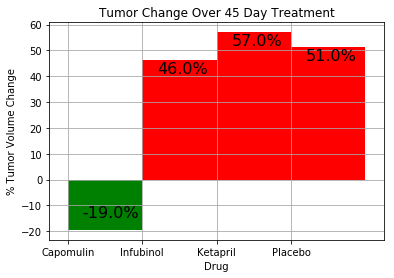

In [10]:
# Store all Relevant Percent Changes into a Tuple

# Splice the data between passing and failing drugs


Tumor_Vol=df2.pivot_table(index='Drug',columns='Timepoint',values='Tumor Volume (mm3)')
Tumor_Vol.drop([5,10,15,20,25,30,35,40], axis =1, inplace=True)
Tumor_Vol=(((Tumor_Vol[45]-Tumor_Vol[0])/Tumor_Vol[0])*100)
# Orient widths. Add labels, tick marks, etc. 

# Use functions to label the percentages of changes

# Generate a bar chart to show percent changes in tumors over a span of 45 days
ax=Tumor_Vol.plot(rot='horizontal',kind='bar',align="edge",color=['g','r','r','r'],width=1)
fig = ax.get_figure()
plt.grid(b=True, which='both', color='0.65', linestyle='-')
plt.ylabel("% Tumor Volume Change")
plt.xlabel('Drug')
plt.title('Tumor Change Over 45 Day Treatment')

# annotate the bar chart
totals =[]
for i in ax.patches:
    totals.append(i.get_height())
total =sum(totals)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.2, (abs(i.get_height())-5)*np.sign(i.get_height()), \
            str(round((i.get_height()), 0))+'%', fontsize=16,\
                color='black')   
fig.savefig('Tumor_Vol.png')

In [ ]:
# Observations
#1. Looking at all the results, Capomulin is the only drug that works in reducing the volume, spread and death of the mouse in this study. The group of mice on this drug had an 85% chance of survival at day 45 of the treatment compared to the other drugs.
#2.Capomulin reduces the tumor volume by 19% as shown in the Tumor_Vol.png plot
#3.None of the drugs completely stop the spread of the tumor. Even the most effective drug Campoulin shows steady and continuous increase of the metastatic sites till the end of the study. 